## Import library

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# installs
#py -m pip install --upgrade nbformat

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [ ]:
# The magic below allows us to use tensorflow version 2.x
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
import pandas as pd
np.random.seed(random_seed)

In [ ]:
import os
import random
from PIL import Image
import PIL.Image
from IPython.display import display, Image
import seaborn as sns
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras import backend as K
from keras.layers import BatchNormalization, Dense
from keras.metrics import categorical_crossentropy
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input


import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import LearningRateScheduler



In [ ]:
## Check if system is using GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

## Data Preprocessing

### Loading Data

In [ ]:
abspath_curr = os.getcwd()
driver_imgs_list = pd.read_csv('./driver_imgs_list.csv',header=0)

In [ ]:
driver_imgs_list.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [7]:
## Getting all the images

train_image = []
image_label = []


for i in range(10):
  print('now we are in the folder C',i)
  directory_path = os.path.join(abspath_curr, "imgs", "train", "c" + str(i))
  files = os.listdir(directory_path)
  for file_name in files:
    img_name = os.path.join(directory_path, file_name)
    img = cv2.imread(img_name)
    #img = color.rgb2gray(img)
    img = img[50:,120:-50]
    img = cv2.resize(img,(224,224))
    label = i
    driver = driver_imgs_list[driver_imgs_list['img'] == file_name]['subject'].values[0]
    train_image.append([img,label,driver])
    image_label.append(i) 



now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7
now we are in the folder C 8
now we are in the folder C 9


In [8]:
## Randomly shuffling the images
random.shuffle(train_image)

### Splitting training and validation

Splitting training and validation set according to the drivers

In [7]:
# ## getting list of driver names

# D = []
# for features,labels,drivers in train_image:
#     D.append(drivers)

# ## Deduplicating drivers

# deduped = []

# for i in D:
#     if i not in deduped:
#         deduped.append(i)
    

# ## selecting random drivers for the validation set
# driv_selected = []
# import random
# driv_nums = random.sample(range(len(deduped)), 4)
# for i in driv_nums:
#     driv_selected.append(deduped[i])


In [9]:
driv_selected = ['p050', 'p015', 'p022', 'p056']

In [10]:
## Splitting the train and test

X_train= []
y_train = []
X_val = []
y_val = []
D_train = []
D_val = []

for features,labels,drivers in train_image:
    if drivers in driv_selected:
        X_val.append(features)
        y_val.append(labels)
        D_val.append(drivers)
    
    else:
        X_train.append(features)
        y_train.append(labels)
        D_train.append(drivers)
    
print (len(X_train),len(X_val))
print (len(y_train),len(y_val))

18732 3692
18732 3692


### Encoding target and resize image

In [11]:
## Converting images to nparray. Encoding the Y

X_train = np.array(X_train).reshape(-1,224,224,3)
X_test = np.array(X_val).reshape(-1,224,224,3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_val)


print (X_train.shape)

(18732, 224, 224, 3)


The images are resized to a square images i.e. 224 x 224 pixels.

## Training

### Creating the directory for the model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Building the architecture of the model

In [12]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model.summary()

In [13]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

# x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.

# x = Dropout(0.1)(x) # ****reduce dropout 

# x=Dense(1024,activation='relu')(x) #dense layer 2

# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# x=Dense(512,activation='relu')(x) #dense layer 3

preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

model = Model(inputs=base_model.input, outputs=preds)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [14]:
# for layer in model.layers:
#      layer.trainable=False
# # or if we want to set the first 20 layers of the network to be non-trainable
# for layer in model.layers[:20]:
#     layer.trainable=False
# for layer in model.layers[20:]:
#     layer.trainable=True

### Compiling the model

In [15]:
from keras import optimizers  

#adam = optimizers.Adam(lr=0.001) #tried 0.0005 - too slow and didn't converge
sgd = optimizers.SGD(learning_rate= 0.005) # try 0.01 - didn't converge and 0.005 , 0.001 best acc of 11%

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy']) # create object


### Training the model

In [16]:
#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('mobilenet_sgd_nolayers.hdf5.keras', verbose=1, save_best_only=True, save_weights_only=True)
earlystopper = EarlyStopping(monitor='accuracy', patience=7, verbose=1)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)




In [17]:
# Fits the model on batches with real-time data augmentation:
mobilenet_model = model.fit(data_generator,steps_per_epoch = int(len(X_train) / 64), callbacks=[checkpointer, earlystopper],
                                                            epochs = 25, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/25
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1045 - loss: 3.2405
Epoch 1: val_loss improved from inf to 3.20083, saving model to mobilenet_sgd_nolayers.hdf5.keras
292/292 ━━━━━━━━━━━━━━━━━━━━ 579s 2s/step - accuracy: 0.1045 - loss: 3.2406 - val_accuracy: 0.0994 - val_loss: 3.2008
Epoch 2/25
  1/292 ━━━━━━━━━━━━━━━━━━━━ 5:17 1s/step - accuracy: 0.1406 - loss: 3.0220
Epoch 2: val_loss did not improve from 3.20083
292/292 ━━━━━━━━━━━━━━━━━━━━ 64s 216ms/step - accuracy: 0.1406 - loss: 1.5162 - val_accuracy: 0.0994 - val_loss: 3.2008
Epoch 3/25
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1050 - loss: 3.2636
Epoch 3: val_loss did not improve from 3.20083
292/292 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.1050 - loss: 3.2636 - val_accuracy: 0.0994 - val_loss: 3.2008
Epoch 4/25
  1/292 ━━━━━━━━━━━━━━━━━━━━ 5:09 1s/step - accuracy: 0.1094 - loss: 3.3804
Epoch 4: val_loss did not improve from 3.20083
292/292 ━━━━━━━━━━━━━━━━━━━━ 64s 215ms/step - accuracy: 0.109

KeyboardInterrupt: 

# Model Analysis

### Plotting the learning curve

#### Creating the directory for the figure

In [ ]:
# Make directory
import os
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

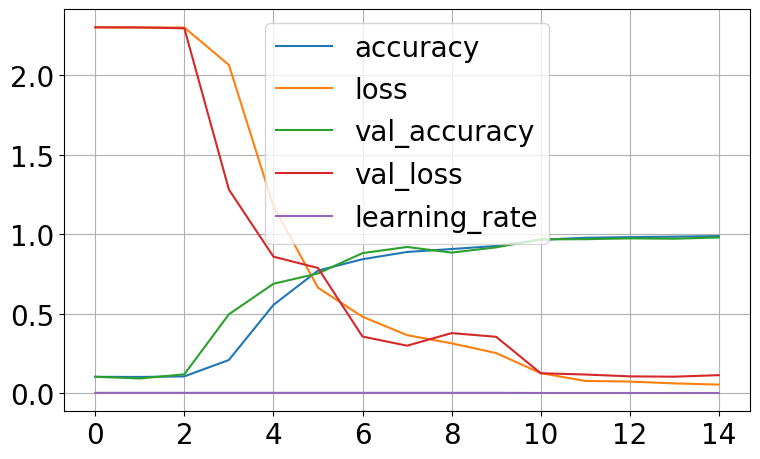

In [ ]:

# Create a figure
pd.DataFrame(mobilenet_model.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_CNN_MobileNet.pdf')
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred = [np.argmax(ele) for ele in y_pred]
y_pred = np.array(y_pred)

# Calculate the confusion matrix
y_true = [np.argmax(ele) for ele in y_val]
y_true =  np.array(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

In [ ]:
sns.heatmap(conf_matrix)